# Wrangle and Analyze data project

## Table of Contents
- [Introduction](#Introduction)
- [Project Flow](#Flow)
- [Gathering Data](#Gathering)
- [Assesing Twitter Archive](#Assessing_Archive)
- [Copying Data frames before cleaning](#Copying)
- [Cleaning Twitter Archive](#Cleaning_Archive)
- [Assesing Image Predictions](#Assessing_Predictions)
- [Cleaning Image Predictions](#Cleaning_Predictions)
- [Assesing Tweets info](#Assessing_info)
- [Cleaning Tweets info](#Cleaning_info)
- [Adding all pieces together](#Final_Frame)
- [First Insight](#First_insight)
- [Second Insight](#Second_insight)
- [Third Insight](#Third_insight)
- [Refernences](#Refernces)

# Introduction

This project is aiming to establish a strong base mainly in assessing and cleaning data sets, also gathering, analysis and visualizing data are parts of this project, they not the main focus. The data set to be studided is mainly the **WeRateDogs Twitter archive** alongside with additional data, **The tweet image predictions** that is created by a neural network for predicting dog breeds, also **Tweets info** that represents a number of specifications for each tweet.

In the insights and analysis section, i'll try to prove each insight with a visualization.




# Flow
In this project, i chose a slightly different flow than usual.
For the **gathering** i'll just collect the whole data normally.

But for the **Assesing** and **Cleaning** phases, i'll deal with each data frame separetly and at once in order to avoid confusion in observing data and to give each data frame a sufficient amount of studying.

# Gathering 

In [1]:
# importing used libiraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
# Twitter archive data
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Predictions of dog breeds data
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(url_image_predictions)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')

In [4]:
# Saving only coloumns to be used later on
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet-json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    
    # Reading line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a dict with the chosen coloumns
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        # Reading Json file
        tweet_json = readfile.readline()
        
               
df_tweets_info = pd.DataFrame.from_dict(data)

# Assessing_Archive
Let's assess the first and the main part of our data, the **twitter archive**.

In [5]:
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
sum(df_twitter_archive.duplicated())

0

In [8]:
Sep = 50;
print('Names count')
print(df_twitter_archive.name.value_counts())
print(Sep*'*')
print('Numerator count')
print(df_twitter_archive.rating_numerator.value_counts())
print(Sep*'*')
print('Denominator count')
print(df_twitter_archive.rating_denominator.value_counts())
print(Sep*'*')
print('Doggo count')
print(df_twitter_archive.doggo.value_counts())
print(Sep*'*')
print('Floofer count')
print(df_twitter_archive.floofer.value_counts())
print(Sep*'*')
print('Pupper count')
print(df_twitter_archive.pupper.value_counts())
print(Sep*'*')
print('Puppo count')
print(df_twitter_archive.puppo.value_counts())

Names count
None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
Daisy         7
Bailey        7
an            7
Buddy         7
Jack          6
Dave          6
Stanley       6
Milo          6
Bella         6
Jax           6
Rusty         6
Leo           6
Scout         6
Koda          6
Oscar         6
Alfie         5
           ... 
Pilot         1
Dug           1
Frönq         1
DayZ          1
Lizzie        1
Kona          1
Harrison      1
Tebow         1
Ronnie        1
Yoda          1
Beckham       1
Marvin        1
Sonny         1
Striker       1
Strider       1
Gustaf        1
Tayzie        1
Horace        1
Mona          1
Filup         1
Blu           1
Ozzie         1
Doobert       1
Jimbo         1
Severus       1
Kevon         1
Ole           1
Skittle       1
Eevee         1
Newt          1
Name: name, 

# Copying
Before cleaning, i'll just make new copies of our data frames to be later used in cleaning.

In [9]:
df_clean_twitter_archive = df_twitter_archive.copy()
df_clean_image_predictions = df_image_predictions.copy()
df_clean_tweets_info = df_tweets_info.copy()

# Cleaning_Archive

## Quality improvements 
>**Twitter Archive:**
>>
* The *retweeted_status_timestamp*, *timestamp* shall be converted into datetime instead of object.
* Splitting *timestamp* into three coloumns day - month - year might be useful for future analysis and then dropping it.
* The *rating_numerator* has some invalid values.
* The *rating_denominator* has also invalid values.
* The *name* coloumn has some invalid data.
* Keeping only original ratings (no retweets) that have images, and dropping coloumns related to retweeting.
* Too little dogs are calssified into *doggo*, *floofer*, *pupper*, *puppo* coloumns, so we might want to check this.
* Creating new coloumn driven out of *doggo*, *floofer*, *pupper*, *puppo* coloumns for future analysis and then dropping them.

>**Notes:**
>>
* Removing all Nulls will surely reduce the data set, so we won't be doing that.
* There is no dublicated data, so also nothing further to do.

## Tidiness 
>**Twitter Archive:**
>>
* No need to take all the data in, since we won't be using all of them, so at the *analyse and visualize* phase, we will just drop unused data **(This step will be done after combining all data sets)**.

We'll go through each of the steps above in the same order in the following coding cells, a **markdown cell** might preceed a coding cell if any explanations is neede, and then i'll make sure that my changes were done correctly.

### *Twitter_archive*
> **Define**
The *retweeted_status_timestamp*, *timestamp* shall be converted into datetime instead of object.

>**Code:**

In [10]:
# Changing data types
df_clean_twitter_archive.timestamp = pd.to_datetime(df_twitter_archive.timestamp)
df_clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_twitter_archive.retweeted_status_timestamp)

> **Test:**

In [11]:
df_clean_twitter_archive.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### *Twitter_archive*
> **Define**
* Splitting *timestamp* into three coloumns day - month - year might be useful for future analysis and then dropping it.

> **Code:**

In [12]:
# Creating new coloumns for year, month and day
df_clean_twitter_archive['year'] = df_clean_twitter_archive['timestamp'].dt.year
df_clean_twitter_archive['month'] = df_clean_twitter_archive['timestamp'].dt.month
df_clean_twitter_archive['day'] = df_clean_twitter_archive['timestamp'].dt.day
df_clean_twitter_archive.drop(['timestamp']
                              , axis = 1, inplace = True)

> **Test:**

In [13]:
# Test
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
year                          2356 non-null int64
month                    

### *Twitter_archive*
> **Define**
* The *rating_numerator* has some invalid values.
we will exclude values less than ten or greater than twenty.

>**Code:**

In [14]:
# Fixing the numerator values issue
df_clean_twitter_archive = df_clean_twitter_archive[df_clean_twitter_archive['rating_numerator'] > 10]
df_clean_twitter_archive = df_clean_twitter_archive[df_clean_twitter_archive['rating_numerator'] < 30]

> **Test:**

In [15]:
# Test
print('Numerator count')
print(df_clean_twitter_archive.rating_numerator.value_counts())

Numerator count
12    558
11    464
13    351
14     54
15      2
27      1
26      1
24      1
20      1
17      1
Name: rating_numerator, dtype: int64


### *Twitter_archive*
> **Define**
* The *rating_denominator* has invalid values.
We will exclude any values rather than 10.

>**Code:**

In [16]:
# Fixing the denominator values issue
def fix_den(row):
    row['rating_denominator'] = 10 
    return row
    
df_clean_twitter_archive = df_clean_twitter_archive.apply(fix_den, axis=1)

> **Test:**

In [17]:
# Test 
print('Denominator count')
print(df_clean_twitter_archive.rating_denominator.value_counts())

Denominator count
10    1434
Name: rating_denominator, dtype: int64


# Fixing the name 
### *Twitter_archive*
> **Define**
* The *name* coloumn has some invalid data.
In this problem, we can search for the dog name, after some key-words like **This is ..** or **named**, this can be done through a function.

>**Code:**

In [18]:
# Fixing the name issue 
def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a' or row['name'] == 'an' or row['name'] == None:    
        text = row['text']
        text = text.lower()
        word_list = text.split()
        name = 'None'

        if 'named' in text:
            pos = word_list.index('named') + 1
            name = word_list[pos]
        elif 'name is' in text:
            pos = word_list.index('name') + 2
            name = word_list[pos]
        elif 'this is' in text:
            pos = word_list.index('this') + 2
            name = word_list[pos]
        row['name'] = name
    
    return row
    

df_clean_twitter_archive = df_clean_twitter_archive.apply(replace_names, axis=1)

> **Test:**

In [19]:
# Test
print('Names count')
print(df_twitter_archive.name.value_counts())

Names count
None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
Daisy         7
Bailey        7
an            7
Buddy         7
Jack          6
Dave          6
Stanley       6
Milo          6
Bella         6
Jax           6
Rusty         6
Leo           6
Scout         6
Koda          6
Oscar         6
Alfie         5
           ... 
Pilot         1
Dug           1
Frönq         1
DayZ          1
Lizzie        1
Kona          1
Harrison      1
Tebow         1
Ronnie        1
Yoda          1
Beckham       1
Marvin        1
Sonny         1
Striker       1
Strider       1
Gustaf        1
Tayzie        1
Horace        1
Mona          1
Filup         1
Blu           1
Ozzie         1
Doobert       1
Jimbo         1
Severus       1
Kevon         1
Ole           1
Skittle       1
Eevee         1
Newt          1
Name: name, 

### *Twitter_archive*
> **Define**
* Keeping only original ratings (no retweets) that have images, and dropping coloumns related to retweeting.

>**Code:**

In [20]:
# Keeping only original rows (no retweets)
df_clean_twitter_archive = df_clean_twitter_archive[pd.isnull(df_twitter_archive['retweeted_status_user_id'])]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


> **Test:**

In [21]:
# Test
sum(df_clean_twitter_archive.retweeted_status_user_id.value_counts())

0

In [22]:
# Dropping rows concerning re-tweets! (They are not useful in any way)
df_clean_twitter_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
                              , axis = 1, inplace = True)

### *Twitter_archive*
> **Define**
* Too little dogs are calssified into *doggo*, *floofer*, *pupper*, *puppo* coloumns, so we might want to check this.
This problem shall be approached by simply checking if any of dog stages is mentioned in the text cell.

>**Code:**

In [23]:
# Checking if all dog stages where correctly taken into consideration
def replace_names(row):
    if 'doggo' in row['text'].lower():
        row['doggo'] = 'doggo'
    elif 'puppo' in row['text'].lower():
        row['puppo'] = 'puppo'
    elif 'pupper' in row['text'].lower():
        row['pupper'] = 'pupper'
    elif 'floofer' in row['text'].lower():
        row['floofer'] = 'floofer'

    return row
    

df_clean_twitter_archive = df_clean_twitter_archive.apply(replace_names, axis=1)

> **Test:**

In [24]:

# Test
print('Doggo count')
print(df_clean_twitter_archive.doggo.value_counts())
print(Sep*'*')
print('Floofer count')
print(df_clean_twitter_archive.floofer.value_counts())
print(Sep*'*')
print('Pupper count')
print(df_clean_twitter_archive.pupper.value_counts())
print(Sep*'*')
print('Puppo count')
print(df_clean_twitter_archive.puppo.value_counts())

Doggo count
None     1203
doggo      79
Name: doggo, dtype: int64
**************************************************
Floofer count
None       1273
floofer       9
Name: floofer, dtype: int64
**************************************************
Pupper count
None      1130
pupper     152
Name: pupper, dtype: int64
**************************************************
Puppo count
None     1255
puppo      27
Name: puppo, dtype: int64


### *Twitter_archive*
> **Define**
* Creating new coloumn driven out of *doggo*, *floofer*, *pupper*, *puppo* coloumns for future analysis and then dropping them.

>**Code:**

In [25]:
# Creating a new coloumn called dog_stage
def replace_names(row):
    if row['doggo'] == 'doggo':
        row['dog_stage'] = 'doggo'
    elif row['puppo'] == 'puppo':
        row['dog_stage'] = 'puppo'
    elif row['pupper'] == 'pupper':
        row['dog_stage'] = 'pupper'
    elif row['floofer'] == 'floofer':
        row['dog_stage'] = 'floofer'
    
    else:
        row['dog_stage'] = 'No Stage'

    return row
    

df_clean_twitter_archive = df_clean_twitter_archive.apply(replace_names, axis=1)

> **Test:**

In [26]:
# Test
df_clean_twitter_archive.dog_stage.value_counts()

No Stage    1025
pupper       144
doggo         79
puppo         26
floofer        8
Name: dog_stage, dtype: int64

In [27]:
# Dropping coloumns 
df_clean_twitter_archive.drop(['doggo','puppo','pupper','floofer']
                              , axis = 1, inplace = True)

## The final result of (df_clean_twitter_archive)

In [28]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 2339
Data columns (total 13 columns):
tweet_id                 1282 non-null int64
in_reply_to_status_id    55 non-null float64
in_reply_to_user_id      55 non-null float64
source                   1282 non-null object
text                     1282 non-null object
expanded_urls            1244 non-null object
rating_numerator         1282 non-null int64
rating_denominator       1282 non-null int64
name                     1282 non-null object
year                     1282 non-null int64
month                    1282 non-null int64
day                      1282 non-null int64
dog_stage                1282 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 140.2+ KB


# Assessing_Predictions
Let's assess the second part of our data, the predictions of dogs breeds.

In [29]:
df_clean_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
sum(df_clean_image_predictions.duplicated())

0

# Cleaning_Predictions

## Quality improvements 
>**Dogs Predictions:**
>>
* Keeping only one coloumn for dog breed.
* Keeping only one coloumn for confidence.


>**Notes:**
>>
* There is no dublicated data, so also nothing further to do.

## Tidiness 
>**Dogs Predictions:**
>>
* Number of enteries in the dogs predictions data **(2075)** is less than our main data frame **(2356)**. This must be taken care of while merging **(This step will be done after combining all data sets)**.
* No need to take all the data in, since we won't be using all of them, so at the *analyse and visualize* phase, we will just drop them.

We'll go through each of the steps above in the same order in the following coding cells **(This step will be done after combining all data sets)**.

### *Image_predictions*
> **Define**
* Keeping only one coloumn for dog breed.
* Keeping only one coloumn for confidence.

>**Code:**

In [32]:
# Keeping only one coloumn for breed and one for confidence
df_clean_image_predictions.drop(['p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog']
                                , axis = 1, inplace = True)

> **Test:**

In [33]:
# Test
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


# Assessing_info
Finally, let's assess the last of our data, the tweets info.

In [34]:
df_tweets_info.head(5)

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [35]:
df_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [36]:
sum(df_tweets_info.duplicated())

0

# Cleaning_info

## Quality improvements 
>**Tweets info:**
>>
* Nothing here to be doing.

## Tidiness 
>**Tweets info:**
>>
* Just renaming *id* coloumn into *tweet_id* for compatability.
* **All the data parts** must be joined together in one data frame.


### *Twitter_archive*
> **Define**
Renaming *id* coloumn into *tweet_id* for compatability.

>**Code:**

In [37]:
# Re-naming coloumn
df_clean_tweets_info.rename(columns={'id':'tweet_id'}, inplace=True)

# Final_Frame

Now, we have a two tasks:
* To start with, let's [put](#Merging) our pieces together in order to start analysing and visualizing our data.
* Lastly, we will [save](#Saving) our data frame into a new data file.

## Merging

In [38]:
# Merging (df_clean_twitter_archive) and (df_clean_image_predictions) into (df_clean_semi)
# knowing that number of enteries is not the same 
df_clean_semi = pd.merge(df_clean_twitter_archive, df_clean_image_predictions, how='left', on=['tweet_id'])
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)[source]
df_clean_semi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 18 columns):
tweet_id                 1282 non-null int64
in_reply_to_status_id    55 non-null float64
in_reply_to_user_id      55 non-null float64
source                   1282 non-null object
text                     1282 non-null object
expanded_urls            1244 non-null object
rating_numerator         1282 non-null int64
rating_denominator       1282 non-null int64
name                     1282 non-null object
year                     1282 non-null int64
month                    1282 non-null int64
day                      1282 non-null int64
dog_stage                1282 non-null object
jpg_url                  1145 non-null object
img_num                  1145 non-null float64
p1                       1145 non-null object
p1_conf                  1145 non-null float64
p1_dog                   1145 non-null object
dtypes: float64(4), int64(6), object(8)
memory usage: 190.3+ KB


In [39]:
# Merging (df_clean_) and (df_clean_semi) into (df_clean_final)
df_clean_final = pd.merge(df_clean_semi, df_clean_tweets_info, how='left', on=['tweet_id'])
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 20 columns):
tweet_id                 1282 non-null int64
in_reply_to_status_id    55 non-null float64
in_reply_to_user_id      55 non-null float64
source                   1282 non-null object
text                     1282 non-null object
expanded_urls            1244 non-null object
rating_numerator         1282 non-null int64
rating_denominator       1282 non-null int64
name                     1282 non-null object
year                     1282 non-null int64
month                    1282 non-null int64
day                      1282 non-null int64
dog_stage                1282 non-null object
jpg_url                  1145 non-null object
img_num                  1145 non-null float64
p1                       1145 non-null object
p1_conf                  1145 non-null float64
p1_dog                   1145 non-null object
favorite_count           1282 non-null int64
retweet_count            1

## Saving 

In [40]:
df_clean_final.to_csv('twitter_archive_master.csv')
df = pd.read_csv('twitter_archive_master.csv')

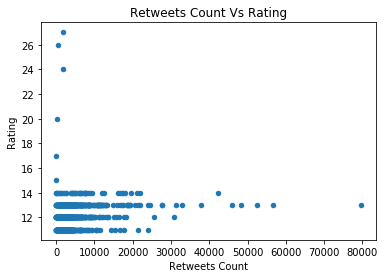

In [41]:
# First_insight
df.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweets Count')
plt.ylabel('Rating')
plt.title('Retweets Count Vs Rating')
# Saving the plot for later usage in the report
fig = plt.gcf()
fig.savefig('First.png',bbox_inches='tight');

> **Observations:**
There is no clear correlation between rating and retweets number.

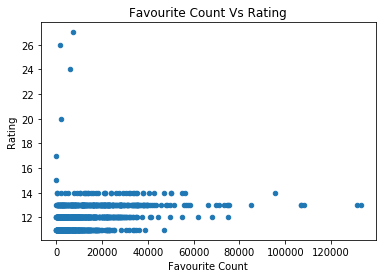

In [42]:
# Second_insight
df.plot(x='favorite_count', y='rating_numerator', kind='scatter')
plt.xlabel('Favourite Count')
plt.ylabel('Rating')
plt.title('Favourite Count Vs Rating')
# Saving the plot for later usage in the report
fig = plt.gcf()
fig.savefig('Second.png',bbox_inches='tight');

> **Observations:**
There is no clear correlation between rating and favourite counts.

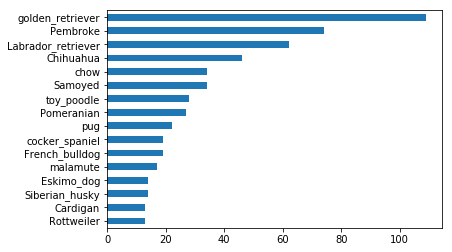

In [43]:
# Third_insight
df.p1.value_counts()[15::-1].plot(kind='barh');
fig = plt.gcf()
fig.savefig('Third.png',bbox_inches='tight');

> **Observations:**
Most rated dogs are golden retreivers and pembroke.

# References 
- Pandas, how to create a new column based on values from other columns, from this stack**overflow** [answer](https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns).
- How to iterate over rows in a DataFrame in Pandas, from this stack**overflow** [answer](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas).
- How to save a figure in jupyter notebook, from this stack**overflow** [answer](https://stackoverflow.com/questions/19271309/matplotlib-save-figure-as-file-from-ipython-notebook).